# Illustrating a few types of Machine Learning
* Unsupervised: Clustering 
* Supervised: Classification
* Supervised: Regression

## Scikit-learn

<img src="images/scikit-learn.png" width=500>

https://scikit-learn.org/stable/index.html
<br>

In [ ]:
# You may need to run the following to install packages
# !pip install scikit-learn ipywidgets plotly

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets


import sklearn.datasets
import sklearn.cluster
import sklearn.linear_model

In [14]:
import plotly.graph_objects as go

## Make some data

This will make 3 clusters of points in a 2D space, with y being a label of 0, 1, or 2.

In [2]:
x, y = sklearn.datasets.make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

In [3]:
# first 5 elements of x
print(x[:5])

[[ 0.42857674  4.9739971 ]
 [ 1.61990909  0.06764529]
 [ 1.43289271  4.37679234]
 [-1.57846247  3.03445802]
 [-1.65862863  2.26746029]]


In [4]:
# first 5 elements of y (the labels)
y[:5]

array([0, 1, 0, 2, 2])

In [6]:
# this is a list of colors to use for plotting
ourcolors = ['red','blue','black','green','yellow','magenta','orange','brown','grey','aqua']

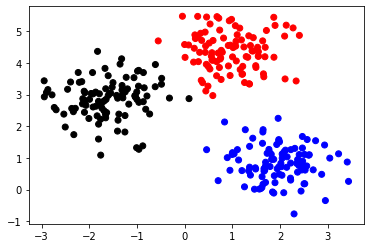

In [7]:
plt.scatter(x[:,0],
            x[:,1],
            color=[ourcolors[i] for i in y])
plt.show()

For our ML examples:
* Unsupervised
    * We'll assume that we **do not** have access to the labels y
* Supervised
    * We'll assume that we **do** have access to the labels y
    * Discrete values of labels -> Classification
    * Continuous values of labels -> Regression
        * We need some continuously-valued labels to showcase regression
        * Set here $y_{4regression} = -3 + 2x_0 + 5x_1$

In [8]:
y_4regression = -3 + 2*x[:, 0] + 5*x[:, 1]

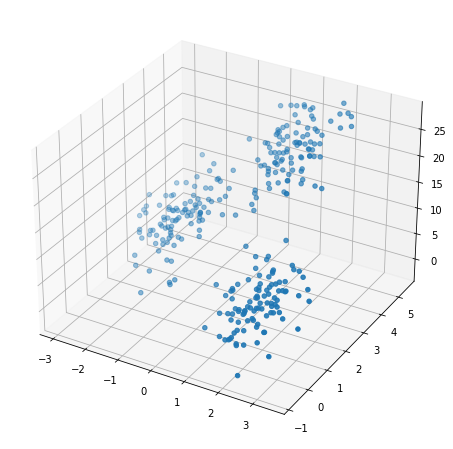

In [9]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')

ax.scatter(x[:, 0], x[:, 1], y_4regression)

There are 2 features here, $x_0$ and $x_1$.

It's kind of hard to visualize trends in 3D.  Let's:
* Make two 2D plots showing how y varies with each component of x
* Calculate the correlation coefficients
* Make a more interactive 3D plot using Plotly

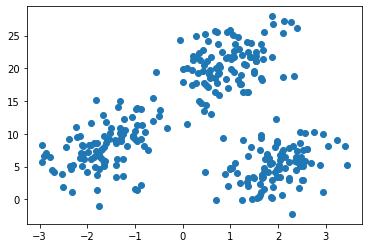

In [10]:
plt.scatter(x[:,0], y_4regression)

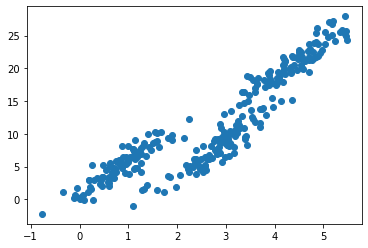

In [11]:
plt.scatter(x[:,1], y_4regression)

In [12]:
np.corrcoef(x[:,0], y_4regression)

array([[1.        , 0.11581108],
       [0.11581108, 1.        ]])

In [13]:
np.corrcoef(x[:,1], y_4regression)

array([[1.        , 0.91189247],
       [0.91189247, 1.        ]])

In [15]:
fig = go.Figure(data=[go.Scatter3d(x=x[:, 0],
                                   y=x[:, 1],
                                   z=y_4regression,
                                   mode='markers',
                                   marker=dict(
                                       size=2,
    ))])
fig.show()

## Unsupervised: Clustering

For unsupervised learning, we'll assume that we do not know what any labels are.
* Ignore `y`

We create an object for our model by calling "KMeans" with the number of clusters we want to look for

In [16]:
# Choose the model

model = sklearn.cluster.KMeans(n_clusters=3)

In [17]:
model

KMeans(n_clusters=3)

In [ ]:
x

We then call the fit method, and pass in the data in which to identify clusters.

In [19]:
# Train the model

model.fit(x)

c:\Users\chief\.conda\envs\geoprj\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



KMeans(n_clusters=3)

The model now has an attribute `labels_` that stores the values of which cluster every point belongs to.

In [20]:
model.labels_

array([2, 0, 2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 1, 2,
       0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 1, 0, 1,
       2, 0, 2, 0, 1, 1, 1, 1, 0, 2, 0, 1, 2, 2, 1, 2, 0, 2, 2, 2, 0, 1,
       2, 2, 1, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 2, 0, 0,
       2, 1, 2, 2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       2, 1, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 0,
       1, 1, 0, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 1,
       2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0,
       2, 0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 0, 1,
       1, 1, 1, 0, 1, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 2, 1])

Example x value:

In [21]:
x[[0]]

array([[0.42857674, 4.9739971 ]])

And an example of its predicted cluster:

In [22]:
model.predict(x[[0]])

array([2])

We can plot the clusters that have been identified by the model by again coloring them.

Color is now the **model label**, not the y-value.

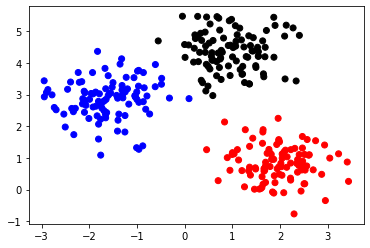

In [23]:
plt.scatter(x[:,0],
            x[:,1],
            color=[ourcolors[i] for i in model.labels_])

The following allows us to interactively see the identified clusters when using KMeans to identify different numbers of clusters.

In [24]:
def plotblobs(n):
    model = sklearn.cluster.KMeans(n_clusters=n)
    model.fit(x)
    plt.scatter(x[:,0], x[:,1], color=[ourcolors[i] for i in model.labels_])
    
ipywidgets.interact(plotblobs,n=(1,10));

interactive(children=(IntSlider(value=5, description='n', max=10, min=1), Output()), _dom_classes=('widget-int…

## Supervised: Classification

For supervised learning, we'll assume that we do know what the labels are.
* Include `y`

We will train a classification algorithm called Logistic Regression.

In [28]:
# Choose the model

model = sklearn.linear_model.LogisticRegression()

In [29]:
# Train the model

model.fit(x, y)

LogisticRegression()

The model training "learns" the optimum parameters of the logistic equation to establish classification boundaries in the $(x_0, x_1)$ space.

In [30]:
model.intercept_

array([-5.92186438,  4.03310763,  1.88875675])

In [31]:
model.coef_

array([[ 1.21529495,  2.07528877],
       [ 1.22049657, -1.77048441],
       [-2.43579152, -0.30480435]])

In order to look at the predictions, let's make a 2D grid of points and plot the predicted values for each point on that grid.

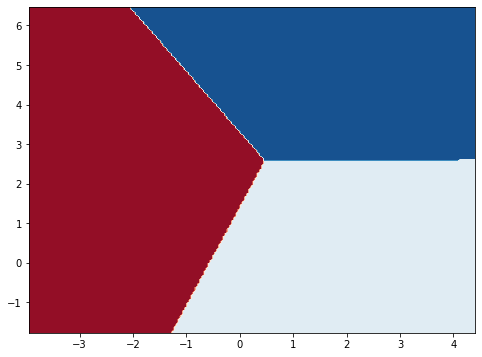

In [32]:
dx = 0.04
dy = 0.04
x_min = x[:, 0].min() - 1
x_max = x[:, 0].max() + 1
y_min = x[:, 1].min() - 1
y_max = x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, dx),
                      np.arange(y_min, y_max, dy))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap="RdBu_r")

We can plot the actual x and y data as scatter points on top of this to see how good the classifier did.

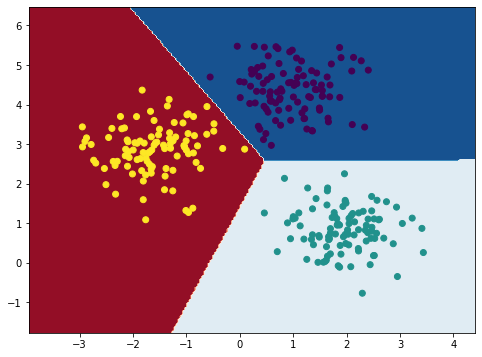

In [33]:
dx = 0.04
dy = 0.04
x_min = x[:, 0].min() - 1
x_max = x[:, 0].max() + 1
y_min = x[:, 1].min() - 1
y_max = x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, dx),
                      np.arange(y_min, y_max, dy))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap="RdBu_r")

plt.scatter(x[:,0], x[:,1], c = y)

## Supervised: Regression

Regression is also supervised learning, and we need labels for our data.
* Regression is for continuous `y` values -> use `y_4regression`

We will train a linear regression algorithm.

In [34]:
# Choose the model

model = sklearn.linear_model.LinearRegression()

In [35]:
# Train the model

model.fit(x, y_4regression)

LinearRegression()

Did the model "learn" the coefficients of our equation?
* $y_{4regression} = -3 + 2x_0 + 5x_1$?

In [36]:
model.intercept_

-3.0000000000000018

In [37]:
model.coef_

array([2., 5.])

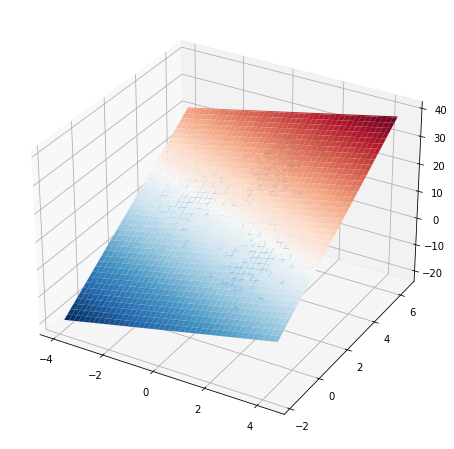

In [38]:
dx = 0.04
dy = 0.04
x_min = x[:, 0].min() - 1
x_max = x[:, 0].max() + 1
y_min = x[:, 1].min() - 1
y_max = x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, dx),
                      np.arange(y_min, y_max, dy))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(xx, yy, Z, cmap="RdBu_r")

ax.scatter(x[:, 0], x[:, 1], y_4regression)

In [40]:
fig = go.Figure(data=[go.Scatter3d(x=x[:, 0], 
                                   y=x[:, 1], 
                                   z=y_4regression, 
                                   mode='markers',
                                   marker=dict(
                                       size=4,
                                   )),
                      go.Surface(x=xx, y=yy, z=Z)])
fig.show()